# Analyse de données de la météo d'un dataset de kaggle

In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 
import pylab

In [11]:
ozone = pd.read_csv("ozoneNA.csv", sep=";")



In [12]:
ozone.head(10)

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15
0,87.0,15.6,18.5,NaN,4.0,4.0,8.0,0.6946,-1.7101,-0.6946
1,82.0,NaN,NaN,NaN,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000
2,92.0,15.3,17.6,19.5,2.0,NaN,NaN,2.9544,NaN,0.5209
3,114.0,16.2,19.7,NaN,1.0,1.0,0.0,NaN,0.3473,-0.1736
4,94.0,NaN,20.5,20.4,NaN,NaN,NaN,-0.5000,-2.9544,-4.3301
5,80.0,17.7,19.8,18.3,6.0,NaN,7.0,-5.6382,-5.0000,-6.0000
6,79.0,16.8,15.6,14.9,7.0,8.0,NaN,-4.3301,-1.8794,-3.7588
7,79.0,14.9,17.5,18.9,5.0,5.0,NaN,0.0000,-1.0419,-1.3892
8,101.0,16.1,19.6,21.4,2.0,NaN,4.0,-0.7660,-1.0261,-2.2981
9,106.0,18.3,NaN,22.9,5.0,NaN,NaN,1.2856,-2.2981,-3.9392


In [13]:
ozone.shape

(112, 10)

In [14]:
ozone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   maxO3   96 non-null     float64
 1   T9      75 non-null     float64
 2   T12     79 non-null     float64
 3   T15     75 non-null     float64
 4   Ne9     78 non-null     float64
 5   Ne12    70 non-null     float64
 6   Ne15    80 non-null     float64
 7   Vx9     94 non-null     float64
 8   Vx12    102 non-null    float64
 9   Vx15    91 non-null     float64
dtypes: float64(10)
memory usage: 8.9 KB


# Les doublons (identifications)

In [15]:
ozone.duplicated().sum()

0

# Données NaN

In [16]:
ozone.isna()

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15
0,False,False,False,True,False,False,False,False,False,False
1,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,True,True,False,True,False
3,False,False,False,True,False,False,False,True,False,False
4,False,True,False,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
107,True,False,True,False,False,False,True,False,False,False
108,False,False,False,True,True,True,True,False,False,True
109,False,True,True,True,True,True,True,False,False,False
110,False,True,True,True,True,False,False,False,False,False


In [17]:
ozone.isna().sum()

maxO3    16
T9       37
T12      33
T15      37
Ne9      34
Ne12     42
Ne15     32
Vx9      18
Vx12     10
Vx15     21
dtype: int64

# Statistique descriptives sans doublons 

In [18]:
ozone.describe()

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15
count,96.000000,75.000000,79.000000,75.000000,78.000000,70.000000,80.000000,94.000000,102.000000,91.000000
mean,91.239583,18.218667,21.462025,22.405333,4.987179,4.985714,4.600000,-1.095754,-1.685325,-1.830079
std,28.935771,2.978921,4.060956,4.735630,2.403966,2.306216,2.373909,2.591248,2.858700,2.543518
min,42.000000,11.300000,14.300000,14.900000,0.000000,0.000000,0.000000,-7.878500,-7.878500,-9.000000
25%,71.000000,16.000000,18.600000,18.900000,3.000000,4.000000,3.000000,-3.000000,-3.694100,-3.758800
50%,81.500000,17.700000,20.400000,21.400000,5.000000,5.000000,5.000000,-0.867100,-1.928400,-1.710100
75%,108.250000,19.900000,23.600000,25.650000,7.000000,7.000000,6.250000,0.691950,-0.130225,0.000000
max,166.000000,25.300000,33.500000,35.500000,8.000000,8.000000,8.000000,5.196200,6.577800,3.830200



# Remplacement des valeurs manquantes

In [22]:
#Remplacement des valeurs manquantes par 0
ozone1 = ozone.fillna(0)

In [23]:
ozone1.head(15)

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15
0,87.0,15.6,18.5,0.0,4.0,4.0,8.0,0.6946,-1.7101,-0.6946
1,82.0,0.0,0.0,0.0,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000
2,92.0,15.3,17.6,19.5,2.0,0.0,0.0,2.9544,0.0000,0.5209
3,114.0,16.2,19.7,0.0,1.0,1.0,0.0,0.0000,0.3473,-0.1736
4,94.0,0.0,20.5,20.4,0.0,0.0,0.0,-0.5000,-2.9544,-4.3301
5,80.0,17.7,19.8,18.3,6.0,0.0,7.0,-5.6382,-5.0000,-6.0000
6,79.0,16.8,15.6,14.9,7.0,8.0,0.0,-4.3301,-1.8794,-3.7588
7,79.0,14.9,17.5,18.9,5.0,5.0,0.0,0.0000,-1.0419,-1.3892
8,101.0,16.1,19.6,21.4,2.0,0.0,4.0,-0.7660,-1.0261,-2.2981
9,106.0,18.3,0.0,22.9,5.0,0.0,0.0,1.2856,-2.2981,-3.9392


In [21]:
ozone1.isna().sum()

maxO3    0
T9       0
T12      0
T15      0
Ne9      0
Ne12     0
Ne15     0
Vx9      0
Vx12     0
Vx15     0
dtype: int64

In [24]:
ozone1.describe()

,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,78.205357,12.200000,15.138393,15.003571,3.473214,3.116071,3.285714,-0.919651,-1.534849,-1.486939
std,41.774629,8.944564,10.400990,11.269611,3.051982,3.030611,2.892764,2.406061,2.769291,2.400074
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.878500,-7.878500,-9.000000
25%,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.577925,-3.464100,-3.000000
50%,77.000000,16.000000,18.700000,18.900000,3.500000,3.000000,3.500000,-0.086800,-1.710100,-0.934100
75%,101.000000,18.850000,22.275000,23.075000,7.000000,6.000000,6.000000,0.520900,0.000000,0.000000
max,166.000000,25.300000,33.500000,35.500000,8.000000,8.000000,8.000000,5.196200,6.577800,3.830200


# GRAPH

In [31]:
data=ozone1["maxO3"].value_counts()
data

0.0      16
71.0      5
77.0      4
72.0      4
76.0      4
70.0      4
88.0      3
83.0      3
67.0      3
92.0      3
63.0      3
79.0      3
65.0      2
149.0     2
106.0     2
159.0     2
60.0      2
98.0      2
84.0      2
116.0     2
81.0      2
121.0     2
146.0     2
114.0     2
59.0      2
101.0     2
113.0     2
69.0      1
82.0      1
90.0      1
78.0      1
108.0     1
94.0      1
96.0      1
126.0     1
117.0     1
45.0      1
160.0     1
74.0      1
42.0      1
80.0      1
56.0      1
87.0      1
139.0     1
99.0      1
156.0     1
75.0      1
66.0      1
153.0     1
131.0     1
55.0      1
109.0     1
166.0     1
111.0     1
Name: maxO3, dtype: int64

Text(0.5, 1.0, "Nombre de fois ou la quantité maximum d'ozone à atteint une certaine valeur  ")

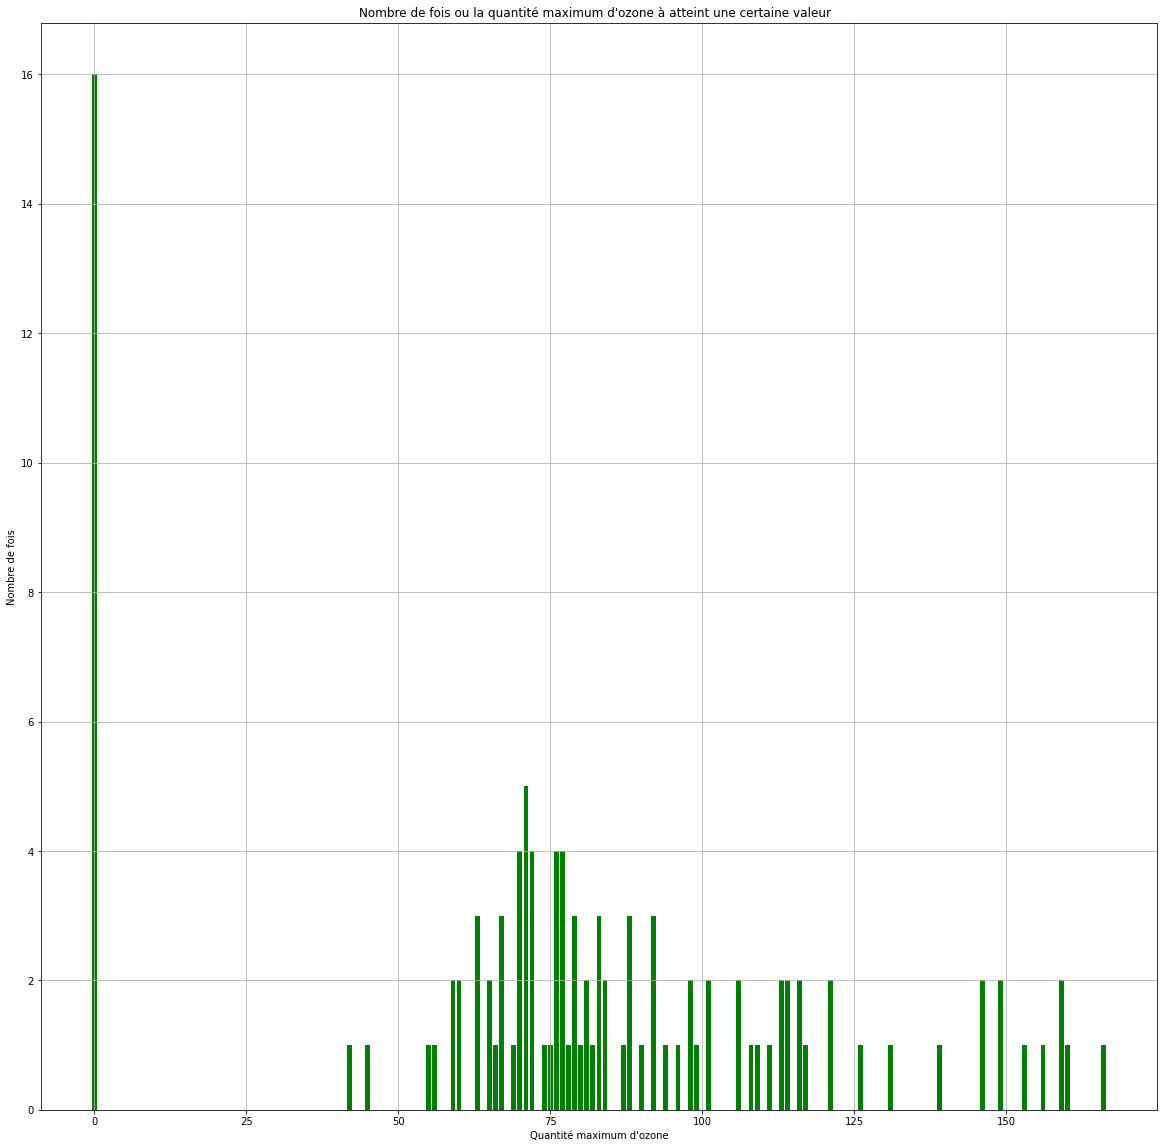

In [32]:
plt.bar(data.index, data, color =["green"])
plt.rcParams["figure.figsize"]=[20,20]
plt.xlabel("Quantité maximum d'ozone")
plt.ylabel("Nombre de fois")
plt.grid()
plt.title("Nombre de fois ou la quantité maximum d'ozone à atteint une certaine valeur  ")

# Boxplot T,Ne,Vx

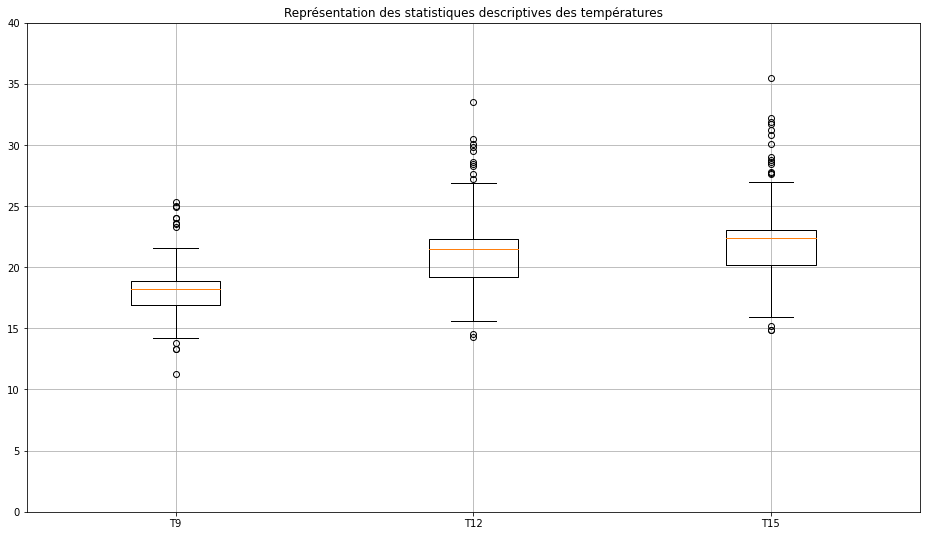

In [185]:
data1= ozone1["T9"]
data2= ozone1["T12"]
data3= ozone1["T15"]

BoxName= ["T9","T12","T15"]

data =[data1,data2,data3]
plt.rcParams["figure.figsize"]=[16,9]
plt.boxplot(data)

plt.ylim(0,40)
pylab.xticks([1,2,3],BoxName)

plt.savefig("Température.png")
plt.title("Représentation des statistiques descriptives des températures")
plt.grid()
plt.show()


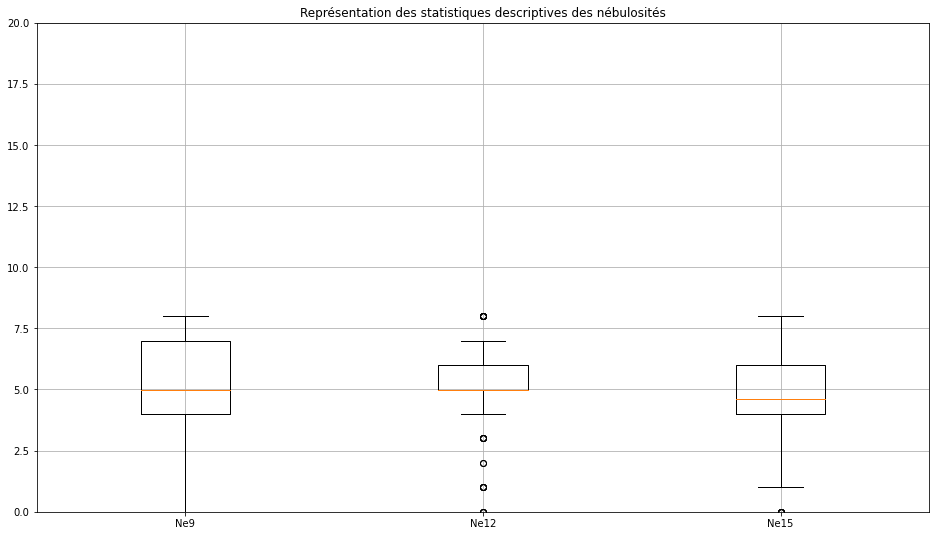

In [184]:
data1= ozone1["Ne9"]
data2= ozone1["Ne12"]
data3= ozone1["Ne15"]

BoxName= ["Ne9","Ne12","Ne15"]

data =[data1,data2,data3]
plt.rcParams["figure.figsize"]=[16,9]
plt.boxplot(data)

plt.ylim(0,20)
pylab.xticks([1,2,3],BoxName)

plt.savefig("Nébulosité.png")
plt.title("Représentation des statistiques descriptives des nébulosités")
plt.grid()
plt.show()

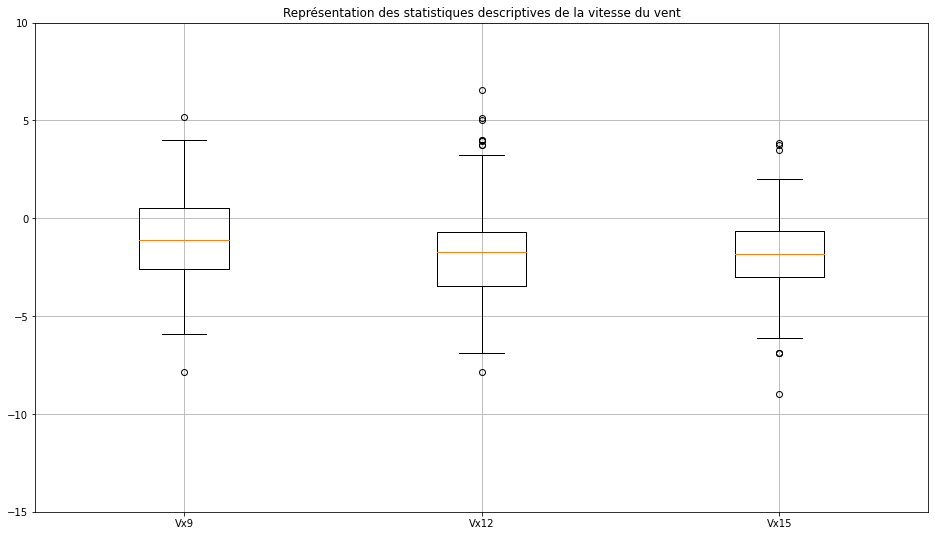

In [200]:
data1= ozone1["Vx9"]
data2= ozone1["Vx12"]
data3= ozone1["Vx15"]

BoxName= ["Vx9","Vx12","Vx15"]

data =[data1,data2,data3]
plt.rcParams["figure.figsize"]=[16,9]
plt.boxplot(data)

plt.ylim(-15,10)
pylab.xticks([1,2,3],BoxName)

plt.savefig("Vitesse du vent.png")
plt.title("Représentation des statistiques descriptives de la vitesse du vent")
plt.grid()
plt.show()